In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
data = pd.read_csv("Netflix.csv")


In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.head(5)

# **Cleaning Data - Filling NaN**
1. Director  - unknown director
2. Cast - unknown cast
3. country - unknown country
4. date_added - Unknown
5. rating - NR
6. Duration - 0
7. Date_added - leaving as NaN only

In [97]:
data.dropna(axis = 1, how = "all",inplace=True)
data["director"].fillna("unknown_director",inplace=True)
data["country"].fillna("unknown_country",inplace = True)
data["cast"].fillna("unknown_cast",inplace = True)
data["rating"].fillna("NR",inplace = True)
data["duration"].fillna("0 time",inplace=True)

In [ ]:
data.info()

# **Cleaning Data - Unesting Columns**
1. Country
2. Cast
3. Listed_in

I just splitting them into Lists, will use explode later whenever needed






In [98]:
data["country"]=data["country"].str.split(",")
data["cast"]=data["cast"].str.split(",")
data["listed_in"]=data["listed_in"].str.split(",")

In [ ]:
data.info()

# **Changing "Rating Columns" from cateogorical to Numerical :**

*   1 --> Very Child Friendly
*   9 --> Stricly adult Content
*   10 -->Not Rated , NAN, other data like 74 min,84min,66min









In [ ]:
data["rating"].value_counts()

In [99]:
data["rating"]=data["rating"].replace(["TV-Y","TV-Y7","TV-Y7-FV","TV-G","G","TV-PG","PG","PG-13","TV-14","R","TV-MA","NC-17","NR","UR","74 min","84 min","66 min"],[1,2,3,4,4,5,5,6,7,8,9,9,10,10,10,10,10])

In [ ]:
data.info()

# **Changing "Duration Columns" from Object to Int**

Ex:


*   TV Shows are given as seasons, so 2 Seasons --> 2
*   Movies are given as min, so 119 mins --> 119



In [100]:
data["duration"]=data["duration"].str.split(expand = True)[0]
data["duration"] = data["duration"].astype("int64")

In [ ]:
data.info()

# **Changing Column "Date_added" Dtype to datetime**

In [101]:
data["date_added"]=data["date_added"].astype("datetime64")

# **Changing Column "release_year" Dtype to datetime**

*   As Only Year given in release_year , Assuming release happend at **1st Jan of Every Year**



In [102]:
data["release_year"]=pd.to_datetime(data["release_year"],format = "%Y")

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   datetime64[ns]
 8   rating        8807 non-null   int64         
 9   duration      8807 non-null   int64         
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 825.8+ KB


# Statistical Analysis of Cleaned Data

In [ ]:
data.describe()

In [ ]:
data.describe(include=object)

In [ ]:
data.describe(datetime_is_numeric=True)

In [ ]:
data.info()

# Creating New & Using Unfiltered Data with DataFrame Name - "data2"

*   To avoid getting Unknown Values in Graphical & Non-Graphical Analysis




In [117]:
data2 = pd.read_csv("Netflix.csv")
data2["country"]=data2["country"].str.split(",")
data2["cast"]=data2["cast"].str.split(",")
data2["listed_in"]=data2["listed_in"].str.split(",")

# Categorical Variable - Graphical & Non-Graphical Analysis

**Type - A Movie or TV Show**

In [110]:
data["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

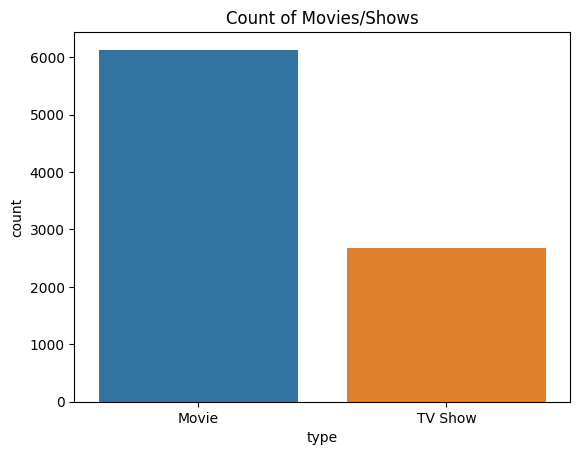

In [111]:
sns.countplot(data = data,x="type")
plt.title("Count of Movies/Shows")
plt.show()

Inference : Movies Qty is more than TV Shows Qty



---



---





**Director**

In [118]:
data2["director"].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [ ]:
sns.countplot(data = data,x="director")
plt.title("Director Count")
plt.show()

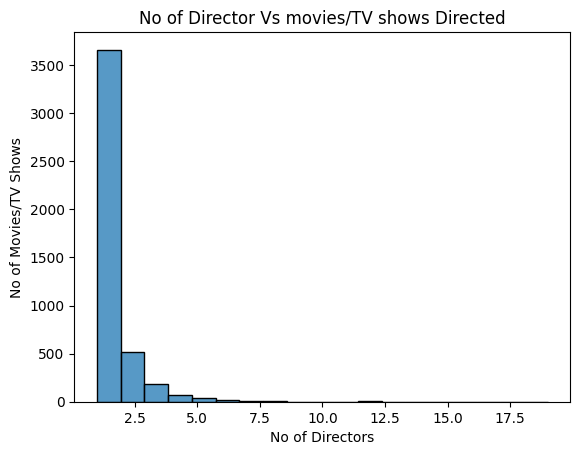

In [122]:
A =data2["director"].value_counts().reset_index()
sns.histplot(A["director"],bins=19)
plt.title("No of Director Vs movies/TV shows Directed")
plt.xlabel("No of Directors")
plt.ylabel("No of Movies/TV Shows")
plt.show()



*   Total Number of Directors in Netflix Platfrom = 4528
*   Maximum Shows Directed = 19
*   Minimum Shows Directed = 1
*   Almost 80% Directors have their show First time in Netflix

---



---



**Cast**

In [125]:
data2.explode("cast")["cast"].value_counts()

 Anupam Kher              39
 Rupa Bhimani             31
 Takahiro Sakurai         30
 Julie Tejwani            28
 Om Puri                  27
                          ..
 Vedika                    1
 Tedros Teclebrhan         1
 Maryam Zaree              1
 Melanie Straub            1
 Chittaranjan Tripathy     1
Name: cast, Length: 39296, dtype: int64

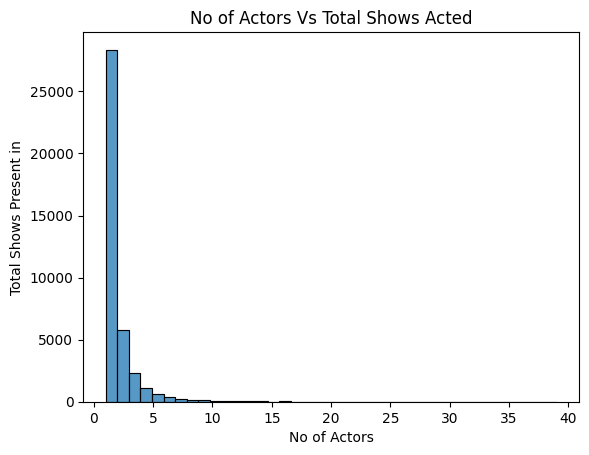

In [124]:
A=data2.explode("cast")["cast"].value_counts().reset_index()
sns.histplot(A["cast"],bins=39)
plt.title("No of Actors Vs Total Shows Acted")
plt.xlabel("No of Actors")
plt.ylabel("Total Shows Present in")
plt.show()

*   Total Number of Actors in Netflix Platfrom = 39296
*   Maximum Shows Acted = 39
*   Minimum Shows Acted = 1
*   Almost 75% Actor have their Show for First time in Netflix

---



---



**Country**

In [126]:
data2.explode("country")["country"].value_counts()

United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
                  ... 
 Ecuador             1
Iran                 1
Cyprus               1
 Mongolia            1
 Montenegro          1
Name: country, Length: 197, dtype: int64

In [ ]:
A = data2.explode("country")["country"].value_counts().reset_index().iloc[:20]
plt.figure(figsize=(40,12))
sns.barplot(data=A,x="index",y="country")
plt.title("Country Vs Shows released")
plt.xticks(rotation=45,fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Country")
plt.ylabel("Total Shows relesed")
plt.show()

*   Netflix content avaiable in 197 Countries
*   Maximum Shows Released in United States

---



---





In [ ]:
plt.figure(figsize=(40,8))
plt.xticks(rotation=90,fontsize = 10)
sns.countplot(data = data.explode("country"), x ="country" ,order =data.explode("country")["country"].value_counts().index )

In [ ]:
A = data.explode("country")["country"].value_counts().reset_index().iloc[:20]
plt.figure(figsize=(40,8))
plt.xticks(rotation=45,fontsize = 20)
sns.barplot(data=A,x="index",y="country")

In [ ]:
showdata = data[data["type"] == "TV Show"].reset_index()
moviedata = data[data["type"] == "Movie"].reset_index()

In [ ]:
data.columns

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data= data["date_added"].dt.week.reset_index(), x="date_added")
plt.show()

In [ ]:
data.explode("director").groupby("director")["title"].count().sort_values(ascending=False)